# Day 2: Fundamentals of Machine Learning

#1. What is Machine Learning?

Machine learning (ML) is a branch of artificial intelligence focused on enabling machines and computers to learn from experience, observations, and mistakes. Fundamentally, a machine learning model is a software application that encapsulates a function to calculate an output value based on one or more input values.

Application of ML algorithms:

- Image and speech recognition
- Fraud detection
- Medical diagnosis
- Spam filtering
- Self-driving vehicles

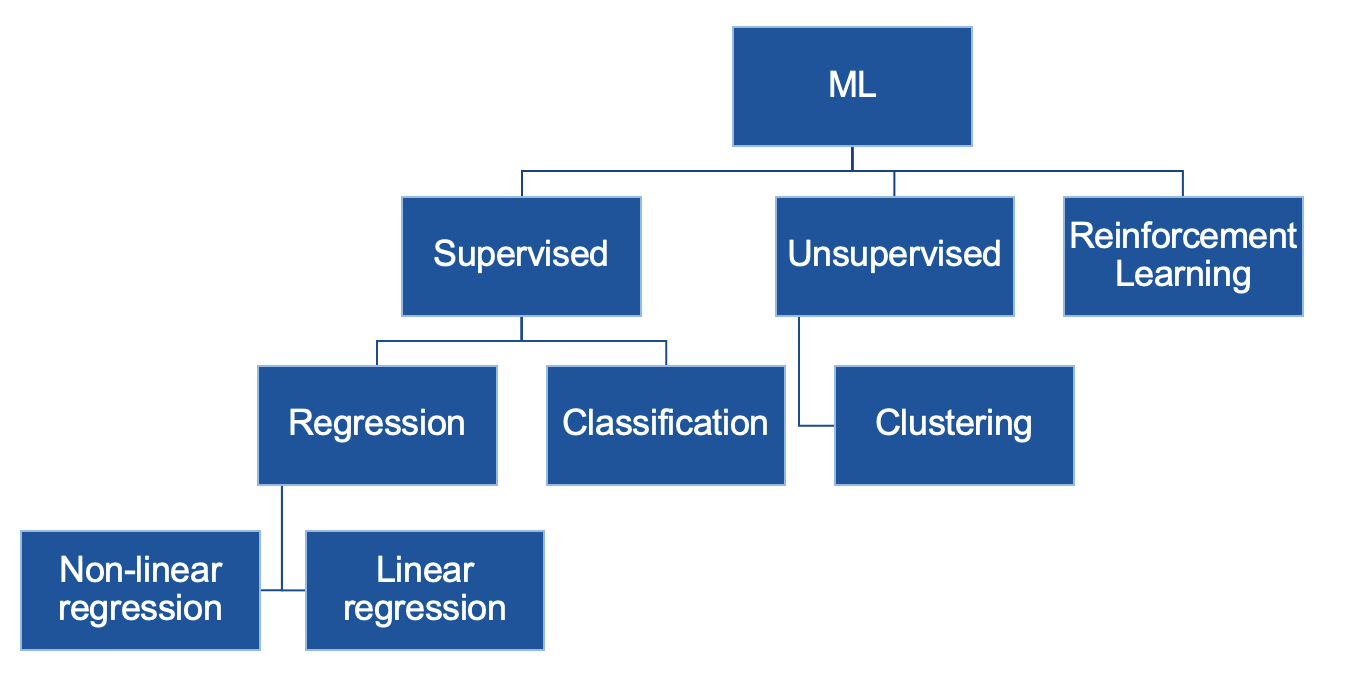

There are three main types of Machine learning algorithms: supervised, unsupervised, and reinforcement learning.

* When the algorithm is supervised, both features **x** and labels **y** are known in the training dataset. It is used to train models by determining a relationship between the features and labels.

* Unsupervised machine learning involves training models using data that consists only of feature values without any known labels. Unsupervised machine learning algorithms determine relationships between the features of the observations in the training data.

* Unlike both supervised and unsupervised learning, reinforcement learning relies on the feedback signal, sent from the environment, to establish if an action is appropriate to the current observation.

# 2. Supervised machine learning

2.1 Important notations
- x: inputs / features
- y: outputs / labels / targets
- (x, y): training example
- X: input space
- Y: output space
- h: X -> Y: hypothesys

2.2 Basic supervised machine learning algorithm

1. The training data consists of past observations. They include the observed features X and the targets Y.

2. An algorithm is applied to the data to try to determine a relationship between the features and the targets, and generalize that relationship as a calculation that can be performed on X to calculate Y.

3. The result of the algorithm is a model that encapsulates the calculation derived by the algorithm as a function, often referred to as a hypothesis function $h$.

4. Last step: inference. It is the process that a trained machine learning model uses to draw conclusions from new input data. The newly predicted label are often refered as $\hat{y}$ in mathematical terms.

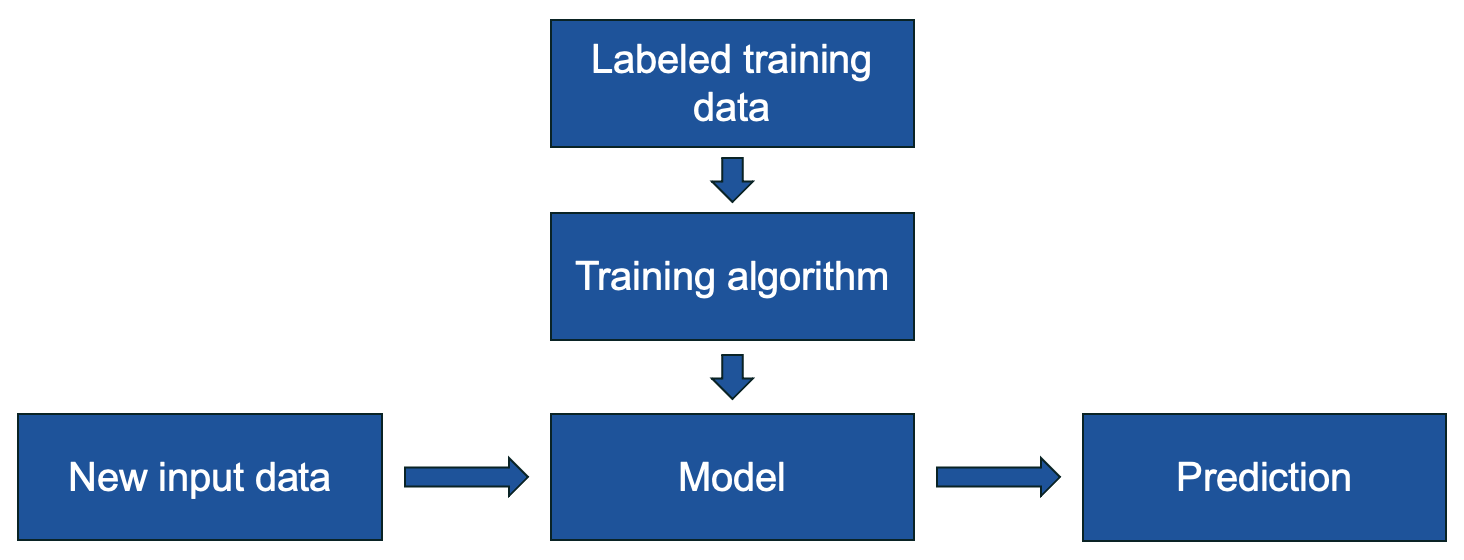

2.3 Regression vs Classification

Regression is a supervised ML algorithm that focuses on predicting continuous numerical outcomes. It aims to establish a relationship between features and targets that is also numerical and continuous. In simpler terms, regression tries to find a function that best maps the input features to the corresponding output values.

Classification is also a supervised ML algorithm, but unlike regression it focuses on assigning data points to predefined categories or classes, dealing with discrete labels. The goal of classification is to learn a mapping from input features to a set of predefined categories. Given a set of features describing a data point, the classification model predicts which category the data point belongs to.  

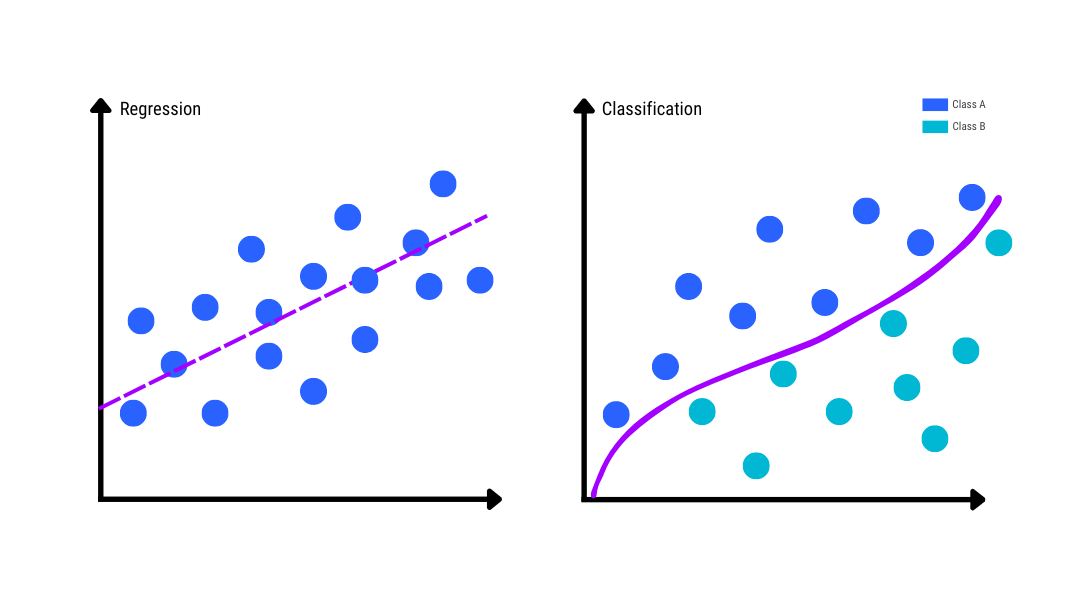

# 3. Linear regression

The main idea of linear regression is to select a linear function, whose parameters fit the data the best, i.e., an error metric between the predictions and the data is minimized. To find the best-fit line through the training data points, we further assume a linear model:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_m x_m$$

Where $ \theta_0 $ is the bias term and $\theta_1, \theta_2, ..., \theta_m$ are the weights of the model.

The next step is parameter identification, which is defined as training. During training, the parameter values, that optimize a measure of the goodness-of-fit, are determined.


4.1 Loss functions

The goodness-of-fit can be quantified using error metrics of the hypothesis function, also known as loss functions. The smaller the error, the better the fit.  There are 3 main error metrics relevant for us:
 $$ \text{MAE (Mean Absolute Error): } E_1(X, f_\theta) \equiv \frac{1}{n}  \sum_{i=1}^n | f_\theta(x_i) - y_i| $$

$$ \text{RMSE (Root Mean Squared Error): } E_2(X, f_\theta) \equiv (\frac{1}{n}  \sum_{i=1}^n ( f_\theta(x_i) - y_i)^2)^{1/2} $$

 $$ \text{Broad definition of error: } E_r(X, f_\theta) \equiv (\frac{1}{n}  \sum_{i=1}^n | f_\theta(x_i) - y_i|^r)^{1/r} $$

The higher the norm index r, the more the error metric focuses on large values and neglects small ones. For example the model using RMSE would be more sensitive to outliers (observations lying at an abnormal distnace from other data values) than the model using MAE.

One of the most common choices for a loss function for a linear regression is MSE (Mean Squared Error):

$$ \text{MSE: } E_2^2(X, f_\theta) \equiv \frac{1}{n}  \sum_{i=1}^n ( \theta^T x_i - y_i)^2 $$

This error metric posesses important features, that make it a better fit for optimization algorithms, based on gradient computation.

Advantages of MSE in the context of gradient descent algorithm:
- always differentiable
- always convex, thus no local minima, only global minimum
- gradually changing slope

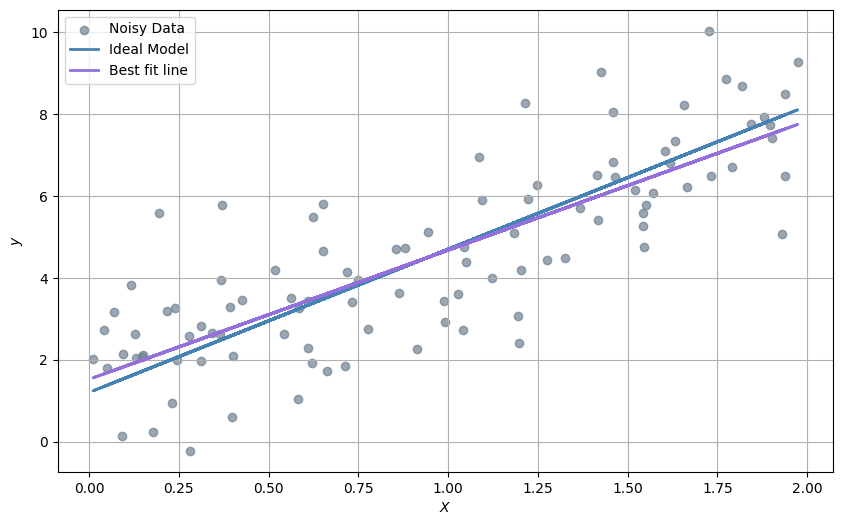

Fitted slope: 3.16
Fitted intercept: 1.52
Mean Squared Error: 1.81


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)
true_slope = 3.5
true_intercept = 1.2
noise = np.random.randn(n_samples, 1) * 1.5
y = true_slope * X + true_intercept + noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Noisy Data", color='slategray', alpha=0.7)
plt.plot(X, true_slope * X + true_intercept, color='steelblue', label="Ideal Model", linewidth=2)
plt.plot(X, y_pred, color='mediumpurple', label="Best Fit Line", linewidth=2)

plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted slope: {model.coef_[0][0]:.2f}")
print(f"Fitted intercept: {model.intercept_[0]:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# 4. Gradient Descent

4.1 Gradient Descent

One of the possible approaches to parameter optimization is Gradient Descent (GD), also called steepest descent.  GD is an algorithm for finding a local minimum of a differentiable function. This local minimum represents a set of optimal parameters $\theta$ that minimizes a given loss function.

Simplified algorithm:
1. Initialization: *$\theta $* is filled with random or predefined values
2. Local Gradient $\frac{\partial E}{\partial \theta}$ is measured
3. Parameters are tweaked to go in the direction of the descending gradient according to the following equation:
$$ \theta_{i+1} =  \theta_i - \eta \frac{\partial E}{\partial \theta} (\theta_i, f_\theta)$$

where $\eta$ is the learning rate
4. Repeat steps 2 and 3 until local gradient $\frac{\partial E}{\partial \theta} = 0$

When optimizing an objective function using GD, two important aspects must be considered:

1. Loss function must be differentiable for all values $\theta$. Not all loss functions display a smooth convex shape, thus they can create challenges for convergence towards the global minimum.

2. The size of the incremental steps is determined by the learning rate $\eta$. If $\eta$ is set too small, the algorithm will take too many iterations to converge, resulting in time-consuming computations. On the other hand, if $\eta$ is set too high, we might overshoot the minimum, which could cause the algorithm to diverge, producing increasingly larger error values and failing to find an optimal solution.

4.2 Batch gradient descent

Batch gradient descent is the most straightforward  implementation of the GD algorithm. It uses the optimizer equation for the full training set **X** at every step.

Applying batch GD for a linear regression problem starts with the computation of the partial derivative of the MSE function with respect to the model's parameter:

$$ \frac{\partial}{\partial \theta} MSE(X, f_\theta) = \frac{2}{n} X^T (X\theta - y) $$

and continues with using the optimizer equation recursively to update the model's parameters. The recursion stops whether we reach the prescribed number of steps (epochs) or the error is smaller than a set threshold.

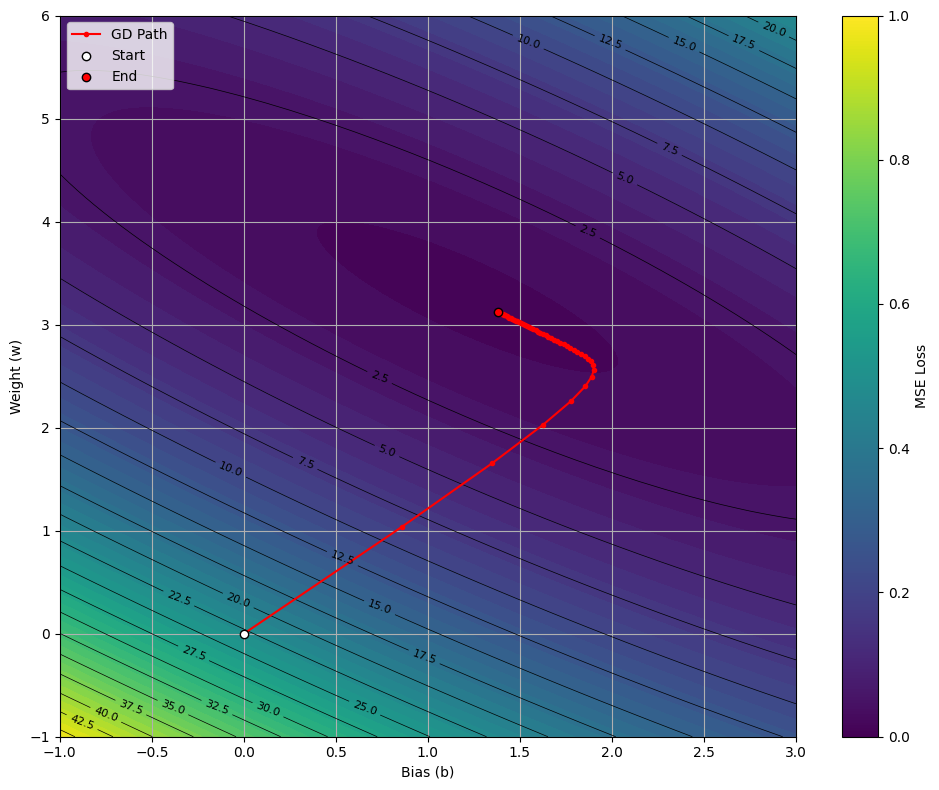

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
true_w, true_b = 3.5, 1.0
y = true_w * X + true_b + np.random.randn(100, 1) * 1.0

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# MSE loss function
def compute_mse(theta):
    preds = X_b.dot(theta)
    return np.mean((preds - y) ** 2)

# Gradient of the MSE loss function
def compute_gradient(theta):
    preds = X_b.dot(theta)
    return (2 / X_b.shape[0]) * X_b.T.dot(preds - y)

theta = np.array([[0.0], [0.0]])  # parameters: bias b, weight w
learning_rate = 0.1
n_iterations = 50
path = [theta.copy()]

# Gradient Descent weight update loop
for _ in range(n_iterations):
    gradient = compute_gradient(theta)
    theta -= learning_rate * gradient
    path.append(theta.copy())

path = np.array(path).squeeze()

# Generate loss surface
b_vals = np.linspace(-1, 3, 100)
w_vals = np.linspace(-1, 6, 100)
B, W = np.meshgrid(b_vals, w_vals)
Z = np.array([
    compute_mse(np.array([[b], [w]]))
    for b, w in zip(B.ravel(), W.ravel())
]).reshape(B.shape)

# Plotting
plt.figure(figsize=(10, 8))
contour = plt.contourf(B, W, Z, levels=50, cmap='viridis')
lines = plt.contour(B, W, Z, levels=20, colors='black', linewidths=0.5)
plt.clabel(lines, inline=True, fontsize=8)

# Plot GD path
plt.plot(path[:, 0], path[:, 1], "r.-", label="GD Path")
plt.scatter(path[0, 0], path[0, 1], color='white', edgecolor='black', zorder=5, label="Start")
plt.scatter(path[-1, 0], path[-1, 1], color='red', edgecolor='black', zorder=5, label="End")

plt.xlabel("Bias (b)")
plt.ylabel("Weight (w)")
plt.colorbar(label="MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. Nonlinear regression

Not all data can be approximated to a simple linear function, however, it is still possible to fit a linear model to nonlinear data. To do this, we just need to replace our original set of independent variables X, with a library
$$ \phi(x)  = [\phi_1(x), \phi_2(x), ... \phi_n(x)]^T $$

 of *n* candidate basis functions, such as polynomials, trigonometric or radial basis functions, or any other user-defined function. By doing this, the hypothesis becomes:
$$ \hat{y} = \theta^T \phi(x)$$

The algorithm described above is called a nonlinear regression. In the following section, we will focus specifically on non-linear regression with polynomial basis functions, in other words, a polynomial regression.

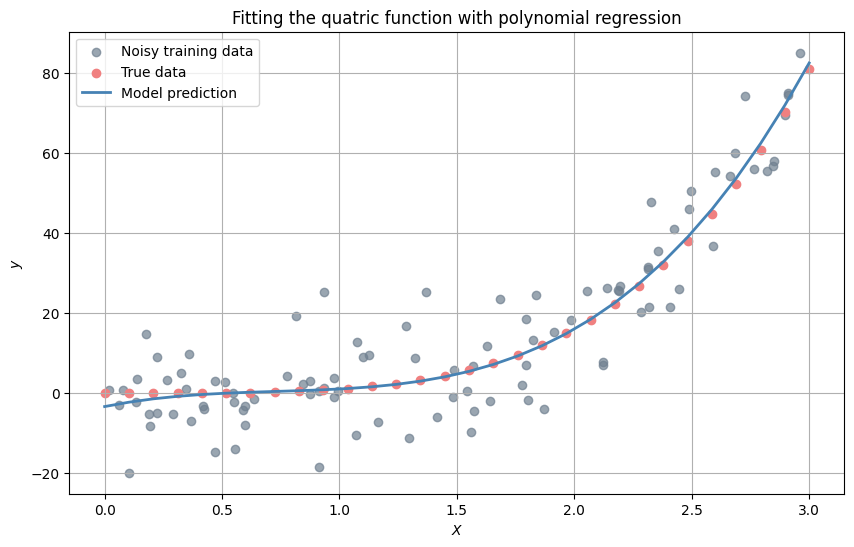

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.sort(3 * np.random.rand(100, 1), axis=0)
y = (X ** 4).ravel() + np.random.normal(0, 10, X.shape[0])


# Specifying the hyperparameter
degree = 4

# PolynomialFeatures(degree) tranforms input features into polynomial features
# LinearRegression() fits the linear regression model to transformed features
# make_pipeline chains two steps into a single object

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X,y) # fit model

# Generate a dense range of X values for smooth prediction curve
X_new = np.linspace(0, 3, 30).reshape(-1, 1)
y_pred = model.predict(X_new)
y_true = (X_new ** 4).ravel()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='slategray', label='Noisy training data', alpha=0.7)
plt.scatter(X_new, y_true, color='lightcoral', label='True data')
plt.plot(X_new, y_pred, color='steelblue', linewidth=2, label='Model prediction')
plt.title('Fitting the quatric function with polynomial regression')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()

# 6. Data preprocessing and model validation

6.1 Feature scaling

Feature scaling is a crucial step in preparing data for training a ML model. Most of the optimization algorithms struggle with differently scaled variables. In the frame of gradient descent, there are two common methods to address this issue: *normalization* and *standardization*. Both techniques transform a feature x into its scaled version $\bar{x}$, according to

$$ \bar{x} = \frac{1}{\alpha} (x - \beta)$$

Normalization shifts and rescales the feature values to a range between -1 and 1, by considering $$ \alpha ≡ \frac{1}{2}(max(x) - min(x))$$ and $$\beta ≡ \alpha + min(x)$$

On the other hand, standardization transforms the feature in a distribution with a zero mean and unit variance, by considering $$ \alpha \equiv \sigma(x)$$ and $$\beta \equiv \mu(x)$$ with μ and σ being the mean and standard deviation, respectively.

Normalization is simple and confines values to a specific range, while standardization is not bound to a range and is less affected by outliers. Whether it is more appropriate to normalize or standardize the data depends mainly on the loss function and the statistics of the data themselves. When the latter are uniformly distributed, normalization is to be preferred, in all the other cases, standardization is the best choice.

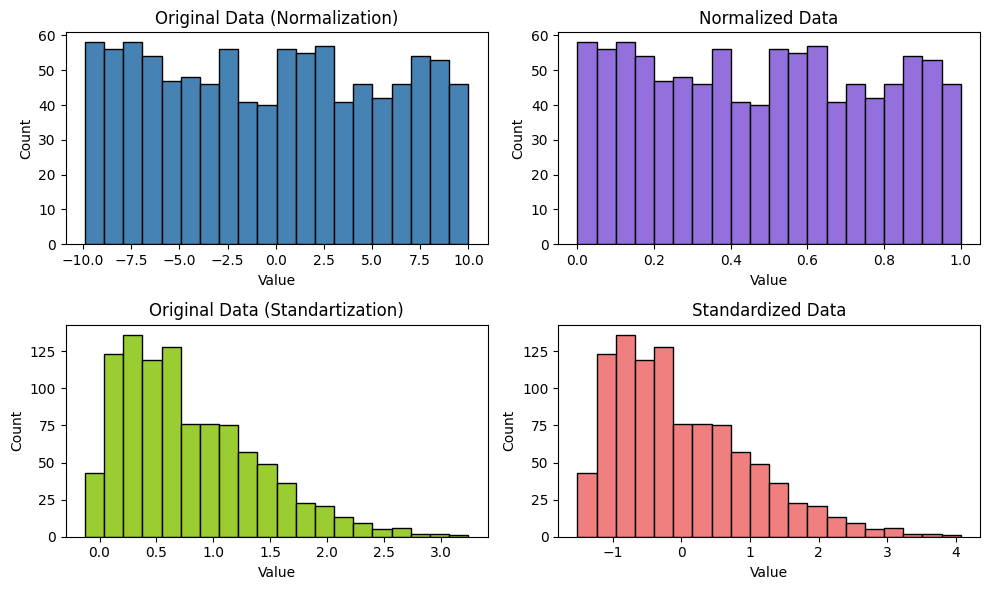

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import skewnorm

# Generating synthetic uniform data
np.random.seed(42)
data_uniform = np.random.uniform(-10, 10, size=(1000, 1))

# Apply normalization
scaler_norm = MinMaxScaler()
data_norm = scaler_norm.fit_transform(data_uniform)

# Generating synthetic skewed data
data_skewed = skewnorm.rvs(a=10, loc=0, scale=1, size=(1000, 1))

# Apply standardization
scaler_std = StandardScaler()
data_std = scaler_std.fit_transform(data_skewed)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Original uniform data
axes[0, 0].hist(data_uniform, bins=20, color='steelblue', edgecolor='black')
axes[0, 0].set_title("Original Data (Normalization)")
axes[0, 0].set_xlabel("Value")
axes[0, 0].set_ylabel("Count")

# Normalized uniform data
axes[0, 1].hist(data_norm, bins=20, color='mediumpurple', edgecolor='black')
axes[0, 1].set_title("Normalized Data")
axes[0, 1].set_xlabel("Value")
axes[0, 1].set_ylabel("Count")

# Original skewed data
axes[1, 0].hist(data_skewed, bins=20, color='yellowgreen', edgecolor='black')
axes[1, 0].set_title("Original Data (Standartization)")
axes[1, 0].set_xlabel("Value")
axes[1, 0].set_ylabel("Count")

# Standardized skewed data
axes[1, 1].hist(data_std, bins=20, color='lightcoral', edgecolor='black')
axes[1, 1].set_title("Standardized Data")
axes[1, 1].set_xlabel("Value")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


6.2 Overfitting vs Underfitting

Earlier in the lecture we focused on the ways to minimize the loss function between predicted labels $\hat{y}$ and given labels $y$. This loss function for training purposes is oftentimes referred to as the training loss/error/cost. However, it is crucial that the model is capable of making accurate predictions on previously unseen data - in other words, capable of generalizing.


- Generalization is the ability of making predictions for new, previously unseen data, drawn from the same distribution as the ones used to train the model.

over_vs_under.svg

We typically say the model overfits the data if the model predicts accurately on the training dataset but doesn't generalize well to unseen examples. Overfitting results in a model that can’t make accurate predictions or conclusions from any data other than the training data, which defeats purpose of the ML model.

Causes of Overfitting:

* ML model is too complex: it memorizes very subtle patterns in the training data that don’t generalize well

* The training data size is too small for the model complexity and/or contains large amounts of noise

We say the model underfits the data if it generates both high testing and traininng error rates. Like overfitting, when a model is underfitted, it cannot establish the dominant trend within the data, resulting in a model unable to generalize well.

Causes of underfitting:
- ML model is too simple
- Insufficient training time
- Missing features


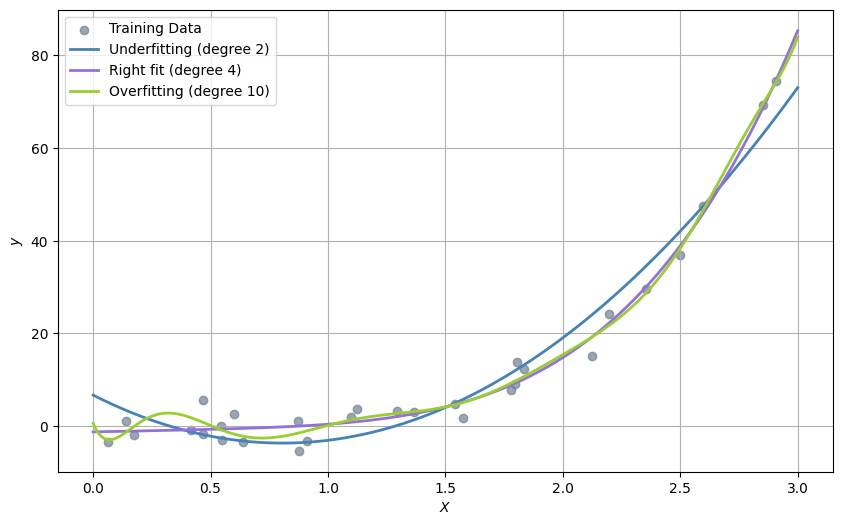

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.sort(3 * np.random.rand(30, 1), axis=0)
y = (X ** 4).ravel() + np.random.normal(0, 3, X.shape[0])

degree_under = 2
degree_perfect = 4
degree_over = 10

model_under = make_pipeline(PolynomialFeatures(degree_under), LinearRegression())
model_perfect = make_pipeline(PolynomialFeatures(degree_perfect), LinearRegression())
model_over = make_pipeline(PolynomialFeatures(degree_over), LinearRegression())

model_under.fit(X, y)
model_perfect.fit(X, y)
model_over.fit(X, y)

X_test = np.linspace(0, 3, 500).reshape(-1, 1)
y_pred_under= model_under.predict(X_test)
y_pred_perfect = model_perfect.predict(X_test)
y_pred_over = model_over.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='slategray', label='Training Data', alpha=0.7)
plt.plot(X_test, y_pred_under, color='steelblue', linewidth=2, label=f'Underfitting (degree {degree_under})')
plt.plot(X_test, y_pred_perfect, color='mediumpurple', linewidth=2, label=f'Right fit (degree {degree_perfect})')
plt.plot(X_test, y_pred_over, color='yellowgreen', linewidth=2, label=f'Overfitting (degree {degree_over})')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()

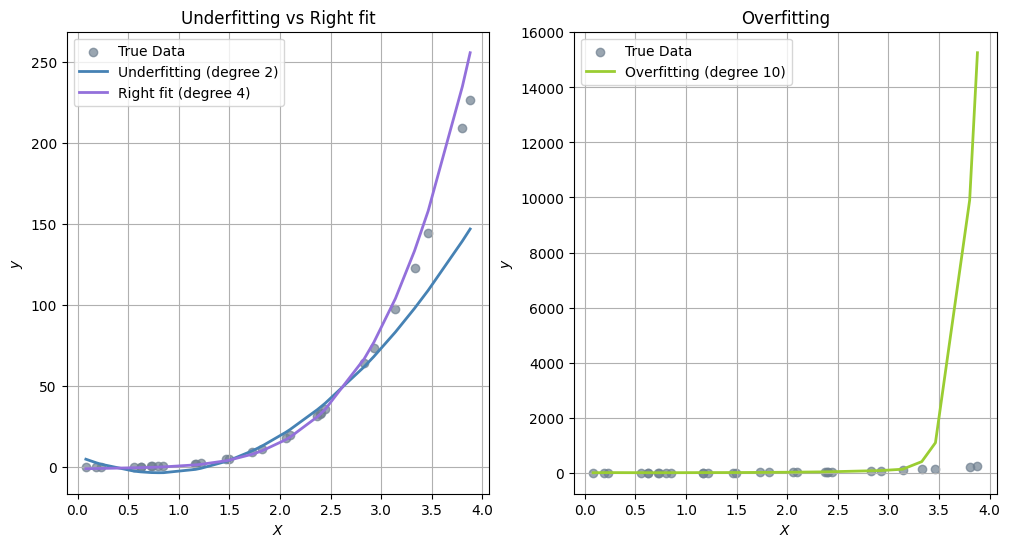

In [ ]:
np.random.seed(42)
X_new = np.sort(4 * np.random.rand(30, 1), axis=0)
y_new = (X_new ** 4).ravel()
y_new_pred_under = model_under.predict(X_new)
y_new_pred_perfect = model_perfect.predict(X_new)
y_new_pred_over = model_over.predict(X_new)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Example of underfitting and a good fit
axes[0].scatter(X_new, y_new, color='slategrey', label='True Data', alpha=0.7)
axes[0].plot(X_new, y_new_pred_under, color='steelblue', linewidth=2, label=f'Underfitting (degree {degree_under})')
axes[0].plot(X_new, y_new_pred_perfect, color='mediumpurple', linewidth=2, label=f'Right fit (degree {degree_perfect})')
axes[0].set_title('Underfitting vs Right fit')
axes[0].set_xlabel('$X$')
axes[0].set_ylabel('$y$')
axes[0].legend()
axes[0].grid(True)

# Example of overfitting
axes[1].scatter(X_new, y_new, color='slategrey', label='True Data', alpha=0.7)
axes[1].plot(X_new, y_new_pred_over, color='yellowgreen', linewidth=2, label=f'Overfitting (degree {degree_over})')
axes[1].set_title('Overfitting')
axes[1].set_xlabel('$X$')
axes[1].set_ylabel('$y$')
axes[1].legend()
axes[1].grid(True)

plt.show()

6.3 bias variance trade-off

Bias measures how far off predictions are from the actual values, on average.

Let's consider an example of underfitting from previous section. The quadratic model is unable to make accurate predictions for both training and testing datasets. This happens because true relationship between X and y are not quadratic but quatric, so the 2nd degree polynomial model is just not complex enough for this dataset. The issue cannot be solved by more training examples — even with a very large amount of, or even infinite training examples, the best fitted quadratic model is still inaccurate and fails to capture the structure of the data. Therefore, the fundamental bottleneck here is the quadratic model family’s inability to capture the structure in the quatric data, not the lack of the data.

This is the case of a high bias model.

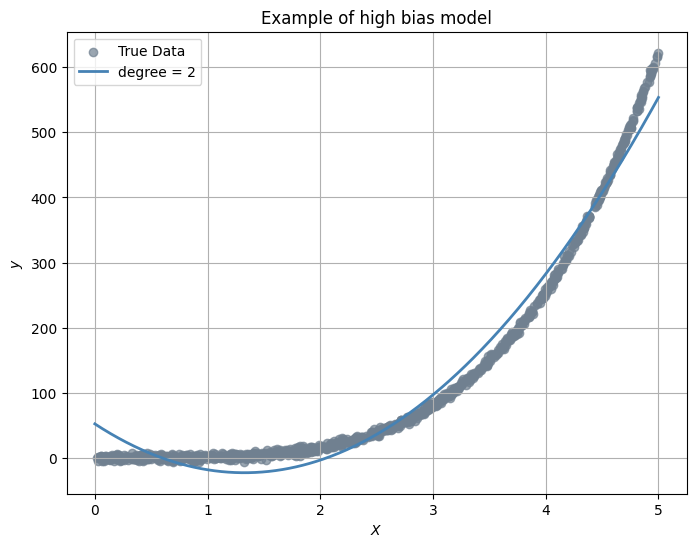

In [ ]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(1000, 1), axis=0)
y = (X ** 4).ravel() + np.random.normal(0, 3, X.shape[0])

degree_bias = 2

model_bias = make_pipeline(PolynomialFeatures(degree_bias), LinearRegression())
model_bias.fit(X, y)

X_test = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred_bias = model_bias.predict(X_test)



# Example of a high bias model
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='slategrey', alpha=0.7, label='True Data')
plt.plot(X_test, y_pred_bias, color='steelblue', linewidth=2, label=f'degree = {degree_bias}')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.title('Example of high bias model')
plt.show()

Variance measures how much a model’s predictions change if it's trained on different datasets.

Let's consider our overfitting example. Contrary to behaviour of quadratic model, 10th degree polynomial shows very small bias. If we were to it to an extremely large dataset, the results would be very close to a quatric function. This is because the family of 10th degree polynomials contains all the quatric functions and are in principle capable of capturing the structure of the data. However, another component of the test error, variance, causes 10th degree polynomial model to still generalize poorly in this case. There is a large risk that we’re fitting patterns in the data that happened to be present in our small, finite training set, but that do not reflect the wider pattern of the relationship between X and y.

The variance can be intuitively characterized by the amount of variations across models learnt on multiple different training datasets (drawn from the same underlying distribution).

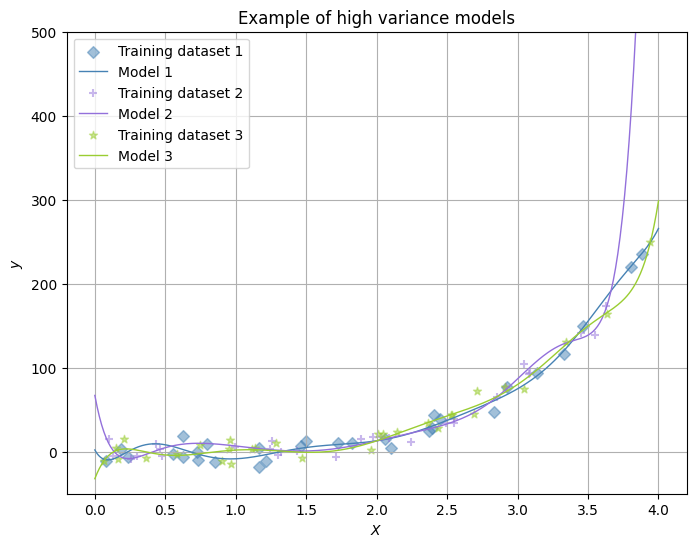

In [ ]:
np.random.seed(42)

# Generating 3 different datasets from the same distribution
X1 = np.sort(4 * np.random.rand(30, 1), axis=0)
y1 = (X1 ** 4).ravel() + np.random.normal(0, 10, X1.shape[0])

X2 = np.sort(4 * np.random.rand(30, 1), axis=0)
y2 = (X2 ** 4).ravel() + np.random.normal(0, 10, X2.shape[0])

X3 = np.sort(4 * np.random.rand(30, 1), axis=0)
y3 = (X3 ** 4).ravel() + np.random.normal(0, 10, X3.shape[0])

degree_over = 10

# Training the model on 3 different datasets
model_over1 = make_pipeline(PolynomialFeatures(degree_over), LinearRegression())
model_over1.fit(X1, y1)

model_over2 = make_pipeline(PolynomialFeatures(degree_over), LinearRegression())
model_over2.fit(X2, y2)

model_over3 = make_pipeline(PolynomialFeatures(degree_over), LinearRegression())
model_over3.fit(X3, y3)

X_test = np.linspace(0, 4, 500).reshape(-1, 1)

y_pred_over1 = model_over1.predict(X_test)
y_pred_over2 = model_over2.predict(X_test)
y_pred_over3 = model_over3.predict(X_test)


# Example of high variance model
plt.figure(figsize=(8, 6))
plt.scatter(X1, y1, color='steelblue', alpha=0.5, marker='D', label='Training dataset 1')
plt.plot(X_test, y_pred_over1, color='steelblue', linewidth=1, label='Model 1')

plt.scatter(X2, y2, color='mediumpurple', alpha=0.5, marker='+', label='Training dataset 2')
plt.plot(X_test, y_pred_over2, color='mediumpurple', linewidth=1, label='Model 2')

plt.scatter(X3, y3, color='yellowgreen', alpha=0.5, marker='*', label='Training dataset 3')
plt.plot(X_test, y_pred_over3, color='yellowgreen', linewidth=1, label='Model 3')

plt.xlabel('$X$')
plt.ylabel('$y$')
plt.ylim(-50, 500)
plt.legend()
plt.title('Example of high variance models')
plt.grid(True)
plt.show()

Often, there is a tradeoff between bias and variance. If our model is too “simple” and has very few parameters, then it may have large bias (but small variance), and it typically may suffer from underfittng. If it is too “complex” and has very many parameters, then it may suffer from large variance (but have smaller bias), and thus overfitting. the test error can be decomposed as a summation of bias and variance. This means that the test error will have a convex curve as the model complexity increases, and in practice we should tune the model complexity to achieve the best tradeoff.

Typical bias-variance tradeoff curve:

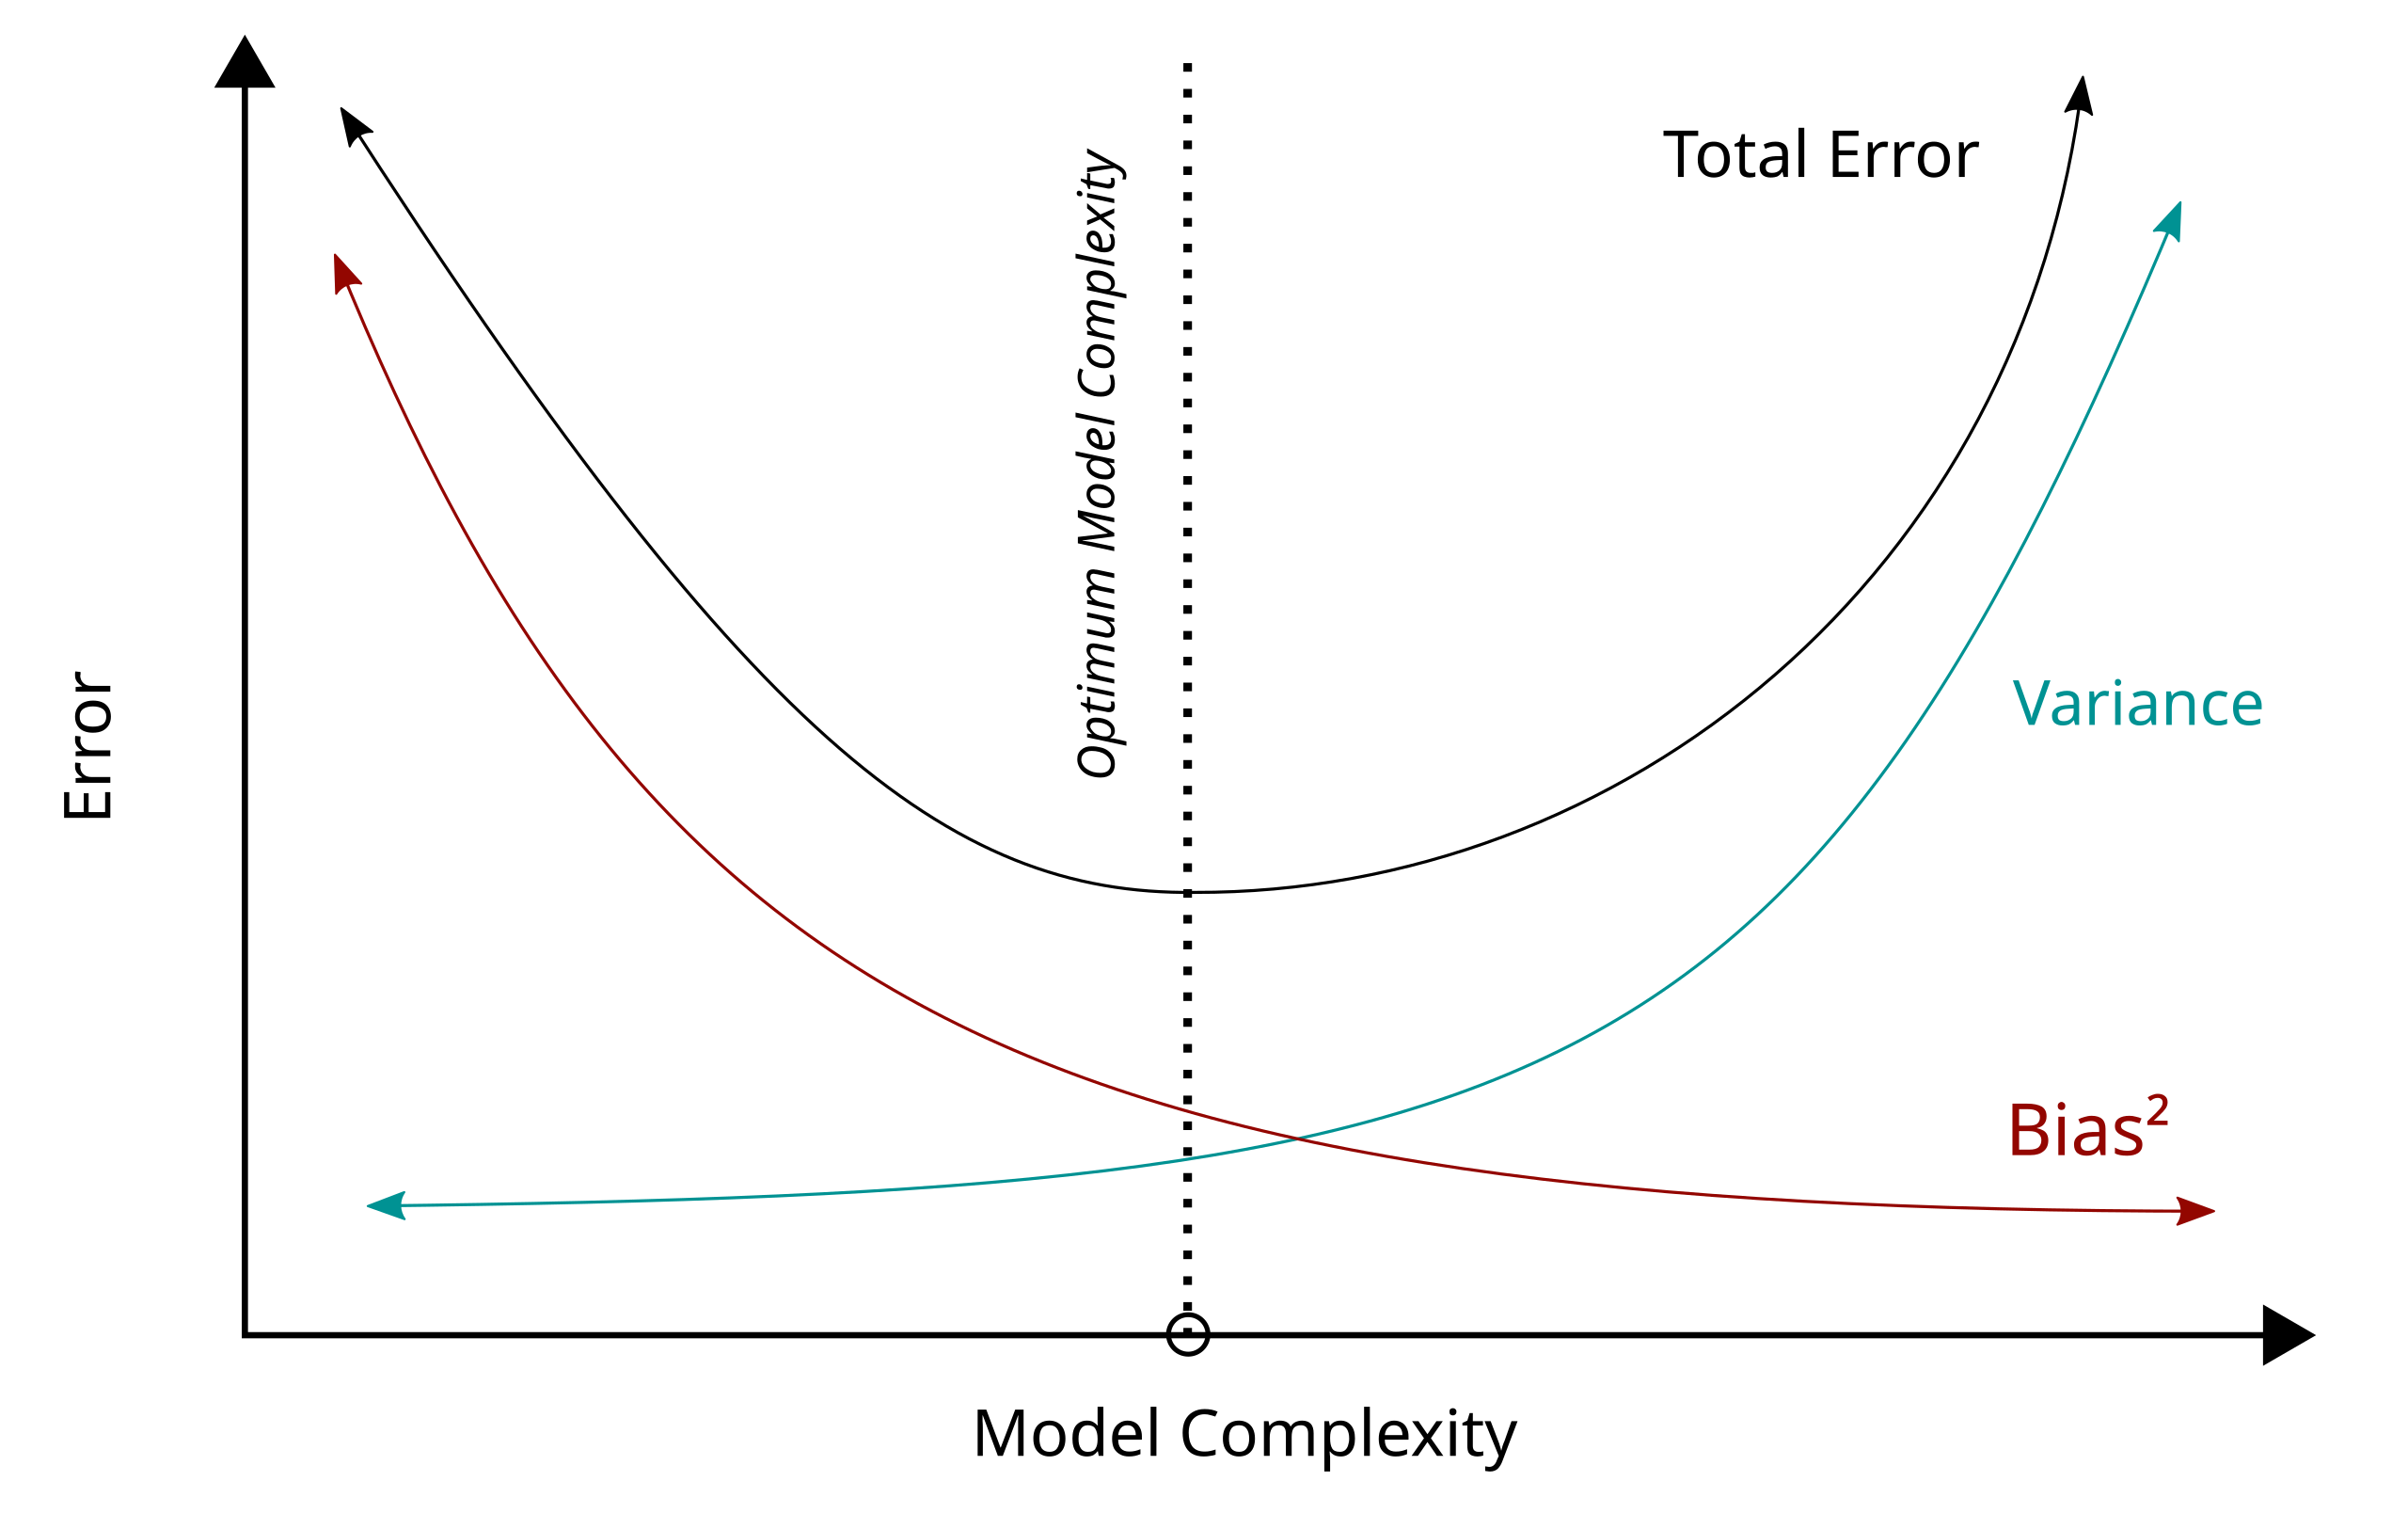

6.4 Cross Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake, that would cause overfitting. One of the techniques to counter this issue is cross validation. The main idea behind it is splitting the dataset into multiple subsets. The testing/validation is performed on one subset, and the rest are used for training.

6.4.1 Hold-out validation

Split dataset in 2 subsets:
- Perform training on subset 1
- Compute test error on subset 2
The covention is to split data 80% / 20% respectively.

Pros:
- Simple implementation
- Low computational cost

Cons:
- Estimates can vary considerably with different train-validation splits
- Only subset of points used to evaluate model


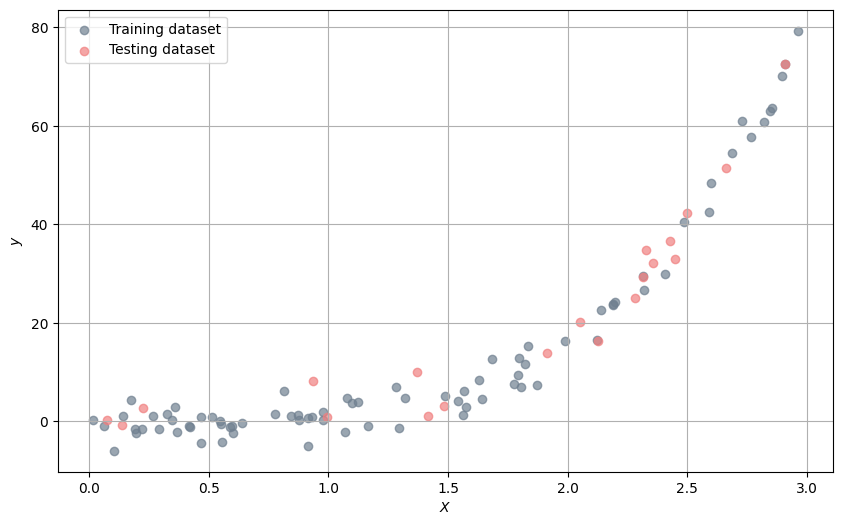

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.sort(3 * np.random.rand(100, 1), axis=0)
y = (X ** 4).ravel() + np.random.normal(0, 3, X.shape[0])

# Method for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='slategrey', alpha=0.7, label='Training dataset')
plt.scatter(X_test,y_test, color='lightcoral', alpha=0.7, label='Testing dataset')
plt.legend()
plt.grid(True)
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

6.4.2 LOOCV (Leave One Out Cross Validation)

For every $i = 1, 2, ..., n$, where $n$ is number of datapoints in dataset:
- Train the model on every point except $i$
- Compute the test error on point $i$

Then compute the average test error.

Pros:
- All data is used for validation, hence low bias

Cons:
- Computationally expensive
- The training samples highly resemble each other. This increases the variance of the test error estimate.

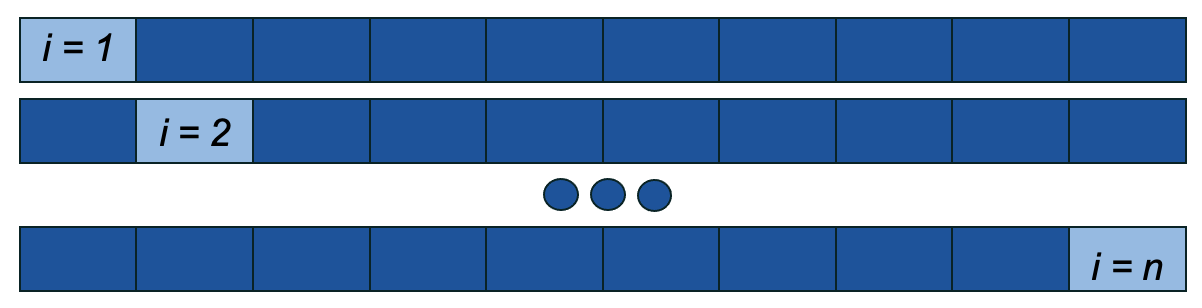

6.4.3 k-fold Cross Validation

Split dataset in $k$ subsets or folds.

For every $i = 1, 2, ... k$:
- Train the model on every fold except $i$th fold
- Compute test error on $i$th fold

Then compute the average test error.

Pros:
- Smaller computational costs than LOOCV
- Training samples differ from each other, hemce lower variance

Cons:
- The model is trained on less data than what is
available. This introduces bias into the estimates of test error.


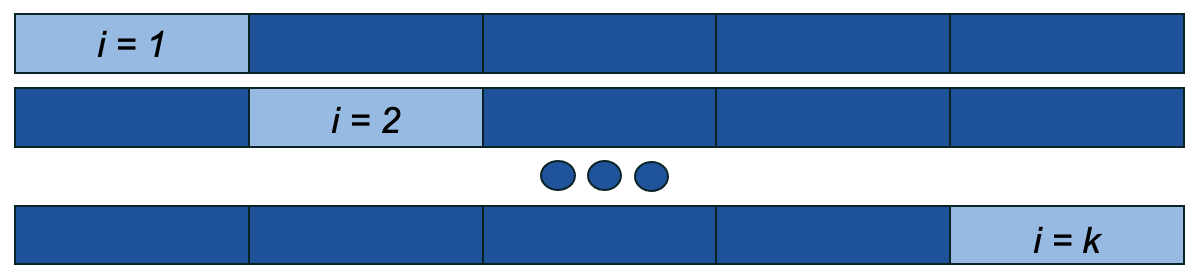

#7. Regularization techniques

Regularization

One way to deal with overfitting is regularization. It is a method for increasing a model’s generalizability, at the sake of increased training error. In other words, regularization methods typically leads to less accurate predictions on training data but more accurate predictions on test data. To put it simply, it increses bias and decreases variance: "bias-variance trade off" occurs.

6.4 Types of regularization

- Lasso regression introduces an L1 penalty (sum of absolute coefficients) to the loss function. It shrinks some coefficients to zero, meaning it can completely remove less important features from the model. This makes Lasso useful for feature selection, as it keeps only the most important predictors.

$$ L ^ {LASSO} (X, f_\theta) = MSE(X, f_\theta) + \lambda_1 ||\theta||_1$$

- Ridge regression adds an L2 penalty (sum of squared coefficients) to the loss function. It shrinks the coefficients of features but doesn’t make them zero, meaning it keeps all features in the model while reducing their influence of certain features. This is useful when you believe all features are valuable but want to limit their impact.

$$ L ^ {Ridge} (X, f_\theta) = MSE(X, f_\theta) + \lambda_2 ||\theta||_2^2$$

- Elastic net regression is a technique that combines L1 (Lasso) and L2 (Ridge) penalties to perform feature selection and handle multicollinearity, balancing coefficient shrinkage and sparsity. Elastic Net is useful when there are many correlated features, as it balances Ridge and Lasso to avoid Lasso’s tendency to remove one feature randomly while keeping another. It provides a more stable and generalizable model compared to using Lasso or Ridge alone.

$$ L ^ {Elastic net} (X, f_\theta) = MSE(X, f_\theta) + \rho\lambda_1 ||\theta||_1 + \frac{ 1 - \rho}{\rho}\lambda||\theta||_2^2$$

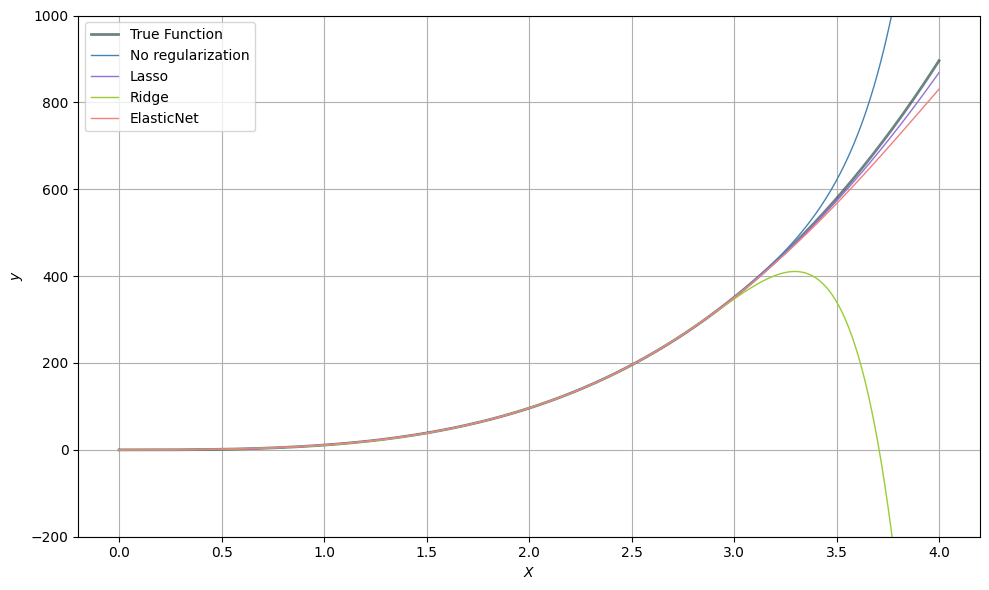

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.sort(3 * np.random.rand(30, 1), axis=0)
y = (X ** 4).ravel() + (10* X ** 3).ravel() - (0.01*X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Define a higher degree for potential overfitting
degree = 10
X_test = np.linspace(0, 4, 500).reshape(-1, 1)

# Define models
models = {
    "No regularization": LinearRegression(),
    "Lasso": Lasso(alpha=0.01, max_iter=10000),
    "Ridge": Ridge(alpha=1),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
}

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_test.ravel(), (X_test ** 4).ravel() + (10 * X_test ** 3).ravel() - (0.01*X_test).ravel(), color='darkslategrey', alpha=0.7, label="True Function", linewidth=2)

colors = ['steelblue', 'mediumpurple', 'yellowgreen', 'lightcoral']
coefs = {}

for (name, model), color in zip(models.items(), colors):
    pipeline = make_pipeline(PolynomialFeatures(degree=degree), model)
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X_test)
    plt.plot(X_test.ravel(), y_pred, label=name, color=color, linewidth=1)
    # Extract linear model and coefficients
    lin_model = pipeline.named_steps[model.__class__.__name__.lower()]
    coefs[name] = lin_model.coef_

plt.xlabel("$X$")
plt.ylabel("$y$")
plt.ylim(-200, 1000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


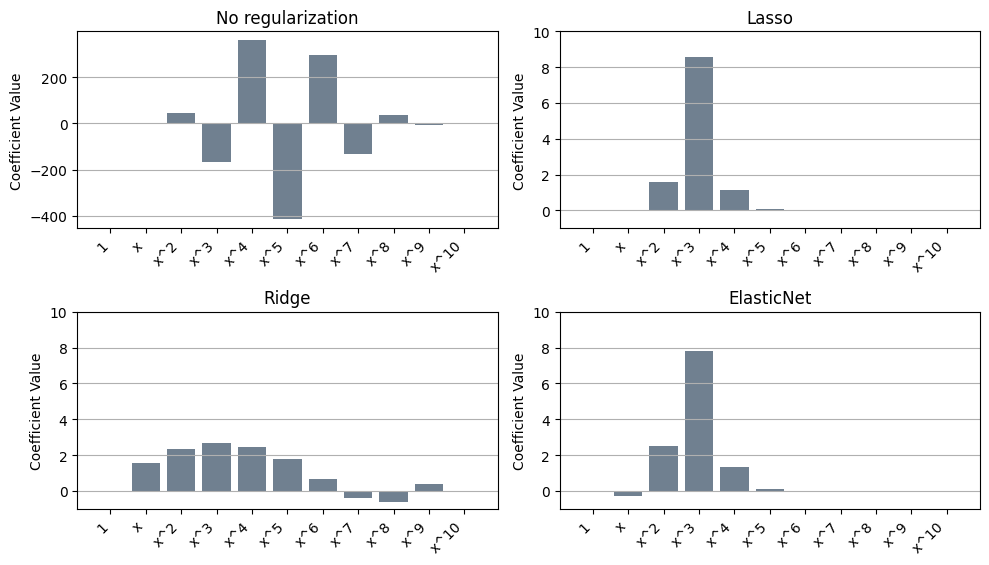

In [ ]:
# Plot coefficients
poly = PolynomialFeatures(degree=degree)
poly.fit(X)
feature_names = poly.get_feature_names_out(['x'])

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()

for ax, (name, coef_vals) in zip(axes, coefs.items()):
    ax.bar(np.arange(len(coef_vals)), coef_vals, color='slategrey')
    ax.set_title(name)
    ax.set_xticks(np.arange(len(feature_names)))
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
    ax.set_ylabel("Coefficient Value")
    ax.grid(axis='y')
    if name != 'No regularization':
      ax.set_ylim(-1, 10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Example

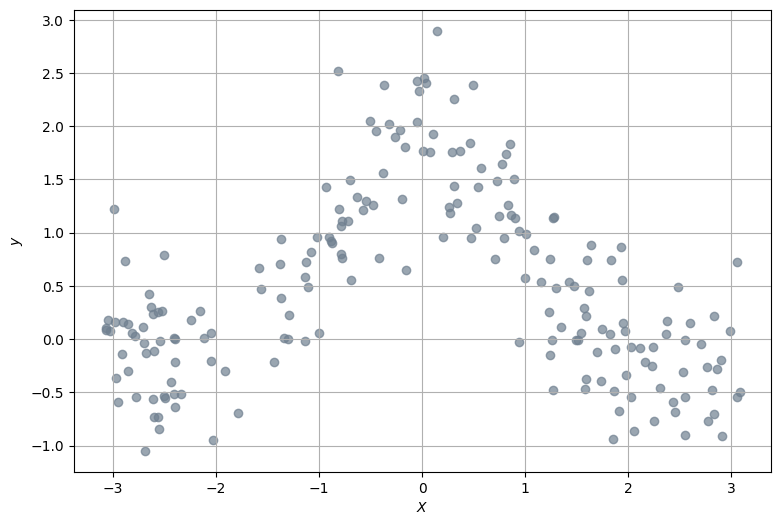

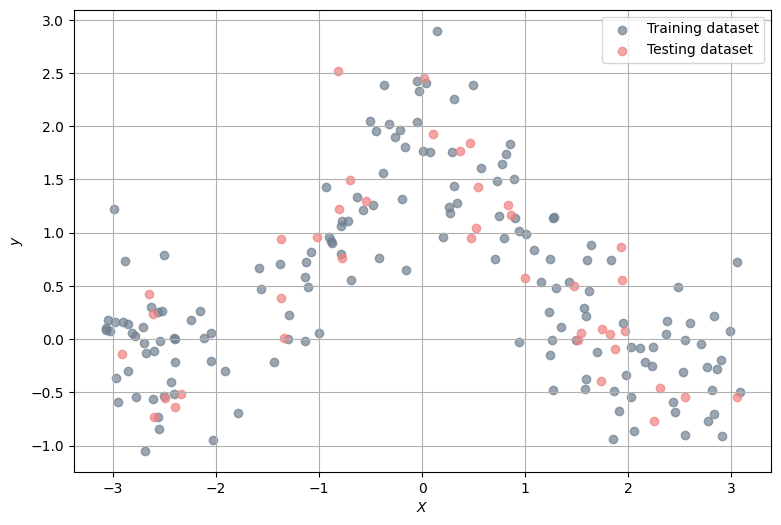

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)
noise = np.random.normal(0,0.5,(200,1))
X = np.random.uniform(-np.pi,np.pi,(200,1))
y = np.cos(np.abs(X))+np.cos(X)**2 + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initial data
fig = plt.figure(figsize=(9, 6))
plt.scatter(X,y, color='slategrey', alpha=0.7)
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.grid()
plt.show()

# Training and testing datasets
fig2 = plt.figure(figsize=(9, 6))
plt.scatter(X_train,y_train, color='slategrey', alpha=0.7, label='Training dataset')
plt.scatter(X_test,y_test, color='lightcoral', alpha=0.7, label='Testing dataset')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

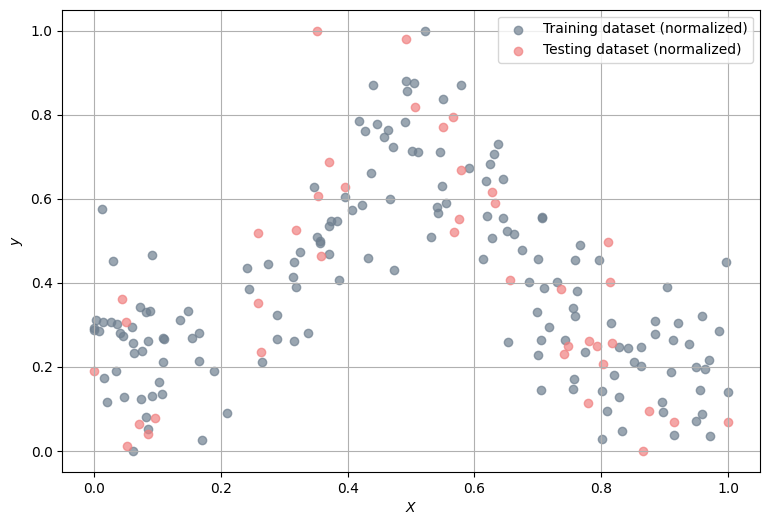

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Data normalization
scaler_norm = MinMaxScaler()
X_train = scaler_norm.fit_transform(X_train)
y_train = scaler_norm.fit_transform(y_train)
X_test = scaler_norm.fit_transform(X_test)
y_test = scaler_norm.fit_transform(y_test)


# Generating new data in a shape of a column vector
X_new = np.expand_dims(np.linspace(-np.pi,np.pi,200),1)

# Normalized data
fig2 = plt.figure(figsize=(9, 6))
plt.scatter(X_train,y_train, color='slategrey', alpha=0.7, label='Training dataset (normalized)')
plt.scatter(X_test,y_test, color='lightcoral', alpha=0.7, label='Testing dataset (normalized)')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

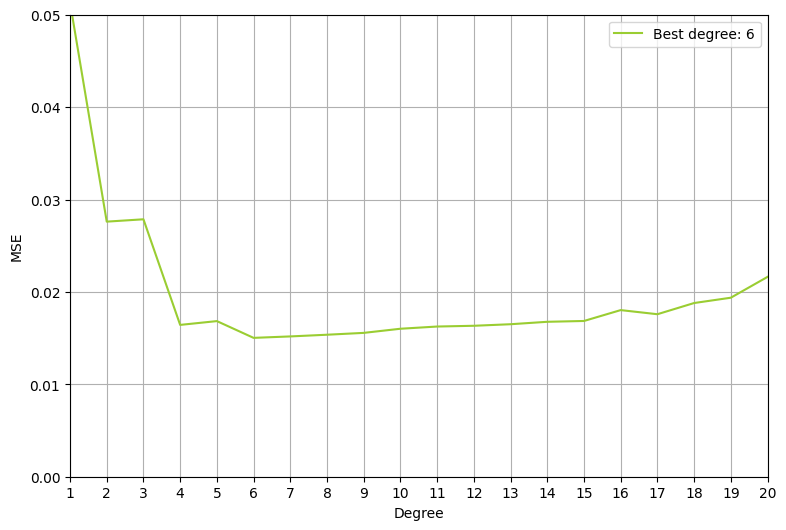

In [ ]:
from sklearn.model_selection import cross_val_score

# testing the model's performance for various degrees
degree = list(range(1, 21))
mse_scores = []
fig = plt.figure(figsize=(9, 6))

for i in range(len(degree)):

    model = make_pipeline(PolynomialFeatures(degree[i]), LinearRegression())
    model.fit(X_train,y_train)

    # 5-fold cross-validation
    scores = cross_val_score(model, X_train, y_train,
                         scoring="neg_mean_squared_error",
                         cv=5)
    mse_scores.append(np.mean(-scores))


best_degree = np.argmin(mse_scores) + 1 # optimal degree

plt.plot(degree, mse_scores, color='yellowgreen', label=f'Best degree: {best_degree}')
plt.xticks(np.arange(0, 21, 1))
plt.xlim(1, 20)
plt.ylim(0, 0.05)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())
model.fit(X_train,y_train)

y_pred = model.predict(X_new)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_training = mean_squared_error(y_pred_train,y_train)
mse_testing = mean_squared_error(y_pred_test, y_test)

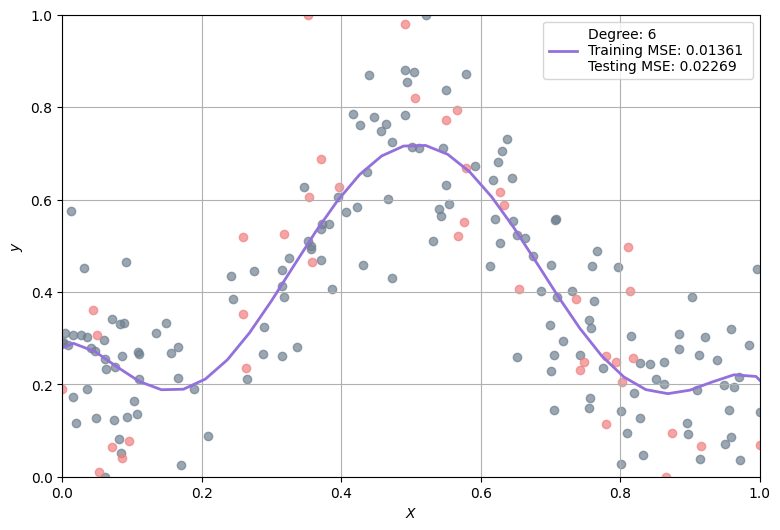

In [ ]:
fig = plt.figure(figsize=(9, 6))
plt.scatter(X_train,y_train, color='slategrey', alpha=0.7)
plt.scatter(X_test,y_test, color='lightcoral', alpha=0.7)
plt.plot(X_new,y_pred, color='mediumpurple', linewidth=2, label=f'Degree: 6 \nTraining MSE: {round(mse_training, 5)} \nTesting MSE: {round(mse_testing, 5)}')
plt.xlabel('$X$')
plt.ylabel('$y$')

plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.legend()
plt.show()

References:
- https://cs229.stanford.edu/main_notes.pdf
- https://web.stanford.edu/~lmackey/stats202/content/lec11-condensed.pdf
- https://github.com/alert-geomaterials/2023-doctoral-school/tree/main/chapters/hands-on/C02
- https://www.mathworks.com/discovery/overfitting.html#
- https://www.ibm.com/think/topics/overfitting-vs-underfitting
- https://home.cs.colorado.edu/~ketelsen/files/courses/csci4622/slides/lesson03.pdf
- https://www.ibm.com/think/topics/machine-learning
- https://safe-intelligence.fraunhofer.de/en/articles/safe-reinforcement-learning
- https://slds-lmu.github.io/i2ml/
